In [1]:
#Import necessary packages
import pandas as pd #Data Frame, data manipulation
import numpy as np #array & numerical manipulation
import csv

import matplotlib.pyplot as plt #data visualizations
import seaborn as sns #data visualizations


import sklearn as sk
from sklearn.preprocessing import StandardScaler #normalize data using z-score
from sklearn.decomposition import PCA #calculate PCA score

import warnings #ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data, keep values of "NONE", explore the data
data = pd.read_csv('C:/Users/12034/OneDrive/Documents/WGU/D212_medical_raw.csv', keep_default_na=False)
data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [3]:
data.shape

(10000, 50)

In [4]:
#Select numerical variables
data2 = data.select_dtypes('number')
data2.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [5]:
data2.shape

(10000, 23)

In [6]:
#Drop discrete numbers
cont_df = data2.drop(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',], axis=1)
cont_df.shape

(10000, 5)

In [7]:
cont_df.columns

Index(['Income', 'VitD_levels', 'Initial_days', 'TotalCharge',
       'Additional_charges'],
      dtype='object')

In [8]:
#Normalize the data
scaler = StandardScaler()
norm_df = scaler.fit_transform(cont_df)

In [9]:
scaled_df = pd.DataFrame(norm_df, columns = cont_df.columns)
scaled_df.head()

,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
0,1.615914,0.583603,-0.907310,-0.727185,0.765005
1,0.221443,0.483901,-0.734595,-0.513228,0.715114
2,-0.915870,0.046227,-1.128292,-1.319983,0.698635
3,-0.026263,-0.687811,-1.244503,-1.460517,0.009004
4,-1.377325,-0.260366,-1.261991,-1.467285,-1.408991


In [10]:
#Confirm data is scaled, mean = 0 and std = 1
scaled_df.describe().round(2)

,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.41,-4.04,-1.27,-1.55,-1.50
25%,-0.73,-0.66,-1.01,-0.98,-0.76
50%,-0.24,-0.01,0.05,-0.05,-0.21
75%,0.48,0.69,1.02,0.98,0.41
max,5.85,4.18,1.43,1.77,2.70


In [11]:
scaled_df.shape

(10000, 5)

In [12]:
#Save output to csv file
scaled_df.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D212_T2_MV_med_clean.csv')

In [13]:
#Create PCA object
pca = PCA()

In [14]:
#Create df where PCA is fit on normalized data
PC = pca.fit_transform(scaled_df)

In [15]:
#Create loading matrix
loading_matrix = pd.DataFrame(pca.components_, columns = cont_df.columns, index=('PC1', 'PC2', 'PC3', 'PC4', 'PC5'))
loading_matrix

,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
PC1,-0.019366,-0.003146,0.706603,0.706923,0.024238
PC2,0.609521,-0.601083,0.023465,0.008270,-0.516299
PC3,0.276692,-0.449571,-0.021756,-0.001785,0.849030
PC4,0.742664,0.660737,0.008371,0.011213,0.108078
PC5,0.001154,-0.001437,-0.706837,0.707151,-0.017763


In [16]:
#Calculate eigenvalues (explained variance) of all PCs
var = pca.explained_variance_
var

array([1.98879493, 1.02068334, 0.99233323, 0.98664355, 0.012045  ])

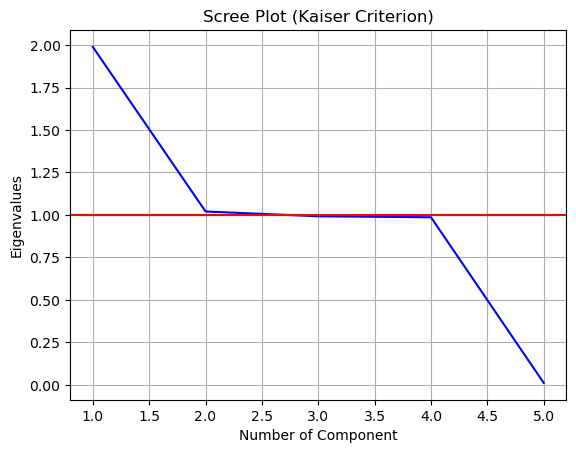

In [17]:
# Create numpy array to start index at 1 not 0
pcomp = np.arange(pca.n_components_) + 1

#Create scree (Kaiser) plot
plt.plot(pcomp,
         var,
         'b')
plt.title('Scree Plot (Kaiser Criterion)')
plt.xlabel('Number of Component')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color="red")
plt.grid()
plt.show()

In [18]:
#PCs 1-2 meet Kaiser Criterion (eigenvalue >= 1)
#Print variance of first 2 PCs
print(dict(zip(['PC1', 'PC2'], pcomp)))

{'PC1': 1, 'PC2': 2}


In [19]:
print("Variance of the first two principal components:")
print(pca.explained_variance_[:2])

Variance of the first two principal components:
[1.98879493 1.02068334]


In [20]:
#Calculate total variance of 2 PCs
total_variance = np.sum(pca.explained_variance_ratio_[:2])
total_variance

0.6018354640861932